In [1]:
#import packages
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [2]:
tips = sns.load_dataset("tips") #load data
print(tips) #print data

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

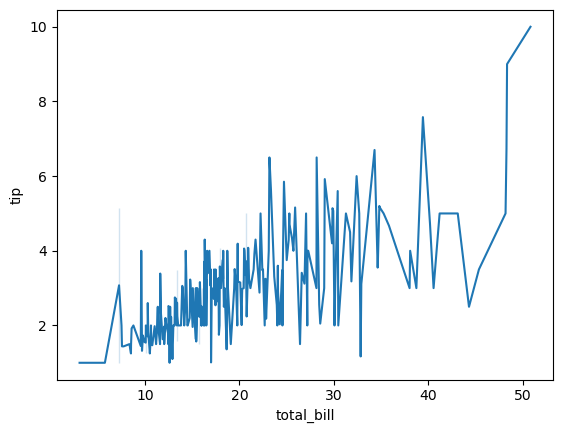

In [3]:
sns.lineplot(data=tips, # data to be plotted
             x='total_bill', # define our x variable
             y='tip') # define our y variable

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

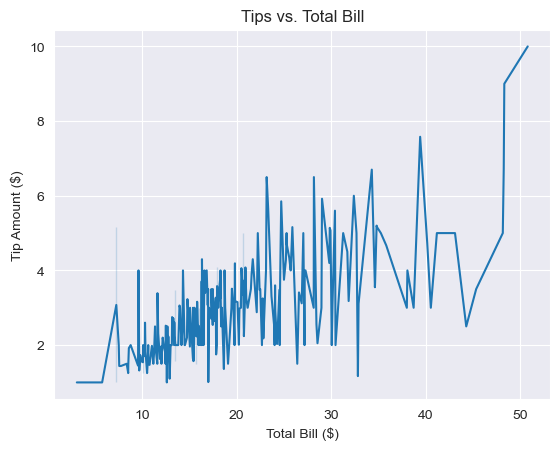

In [4]:
sns.set_style('darkgrid') #use premade styles to alter the plot
tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
                        y='tip')
tipgraph.set(title='Tips vs. Total Bill', #add title
             xlabel='Total Bill ($)', #add x label
             ylabel='Tip Amount ($)') #add y label

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

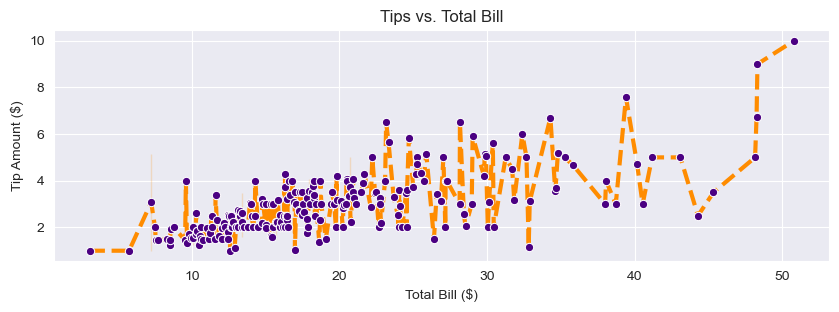

In [5]:
fig = plt.subplots(figsize=(10, 3)) #change figure size

tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
                        y='tip',
                        color = 'darkorange', #modify line color
                        linestyle = '--', 
                        linewidth = 3,
                        marker = 'o',#modify marker shape
                        markerfacecolor = 'indigo')

tipgraph.set(title='Tips vs. Total Bill', 
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)') 

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

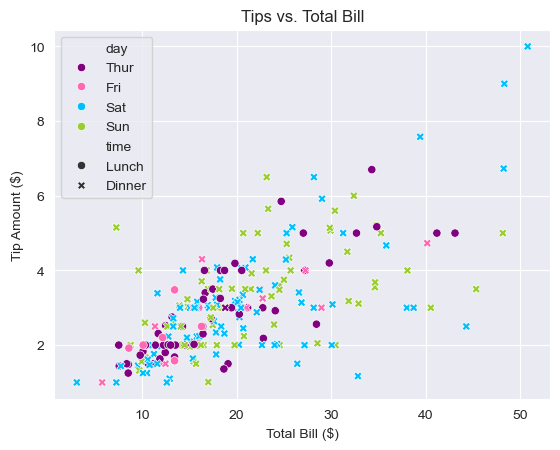

In [6]:
tipgraph = sns.scatterplot(data=tips, 
                           x='total_bill',
                           y='tip',
                           style = 'time', #modify marker style based on time
                           hue ='day', #modify marker color based on day
                           palette = ['purple',
                                      'hotpink', 
                                      'deepskyblue',
                                      'yellowgreen'])
tipgraph.set(title='Tips vs. Total Bill',
             xlabel='Total Bill ($)',
             ylabel='Tip Amount ($)')

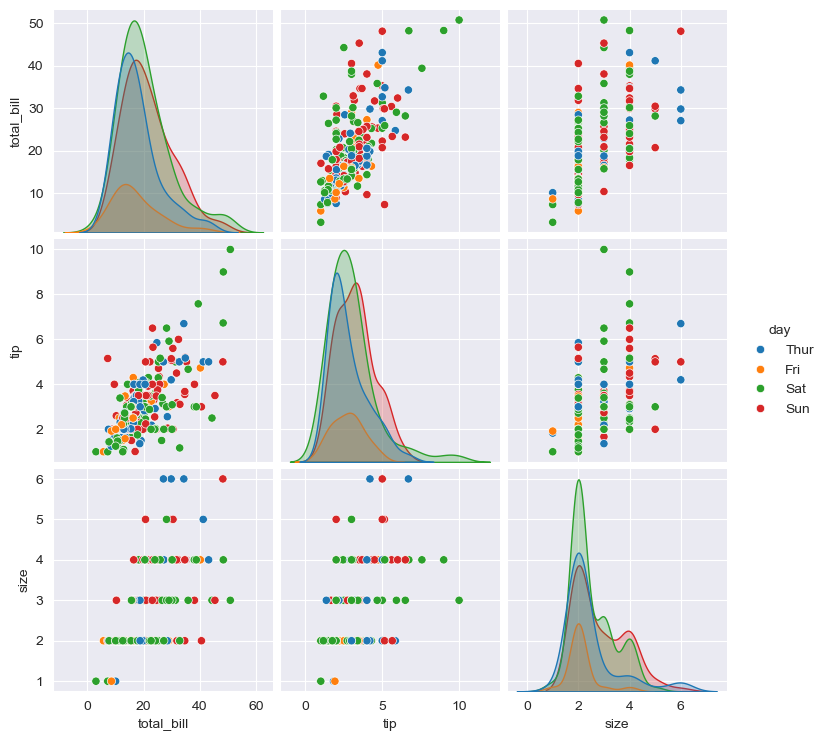

In [7]:
sns.pairplot(data = tips,
             hue = 'day')

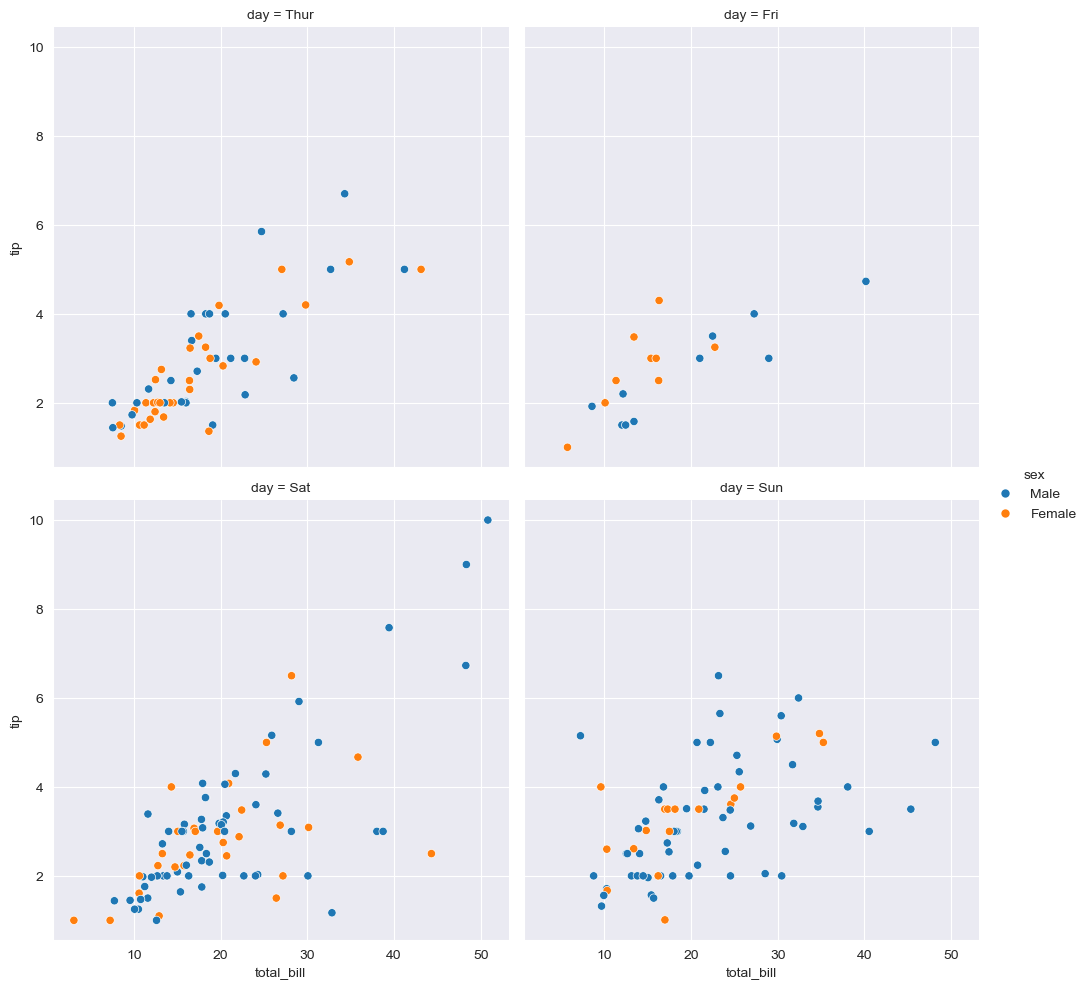

In [16]:
daysplot = sns.relplot(data=tips,
                       x="total_bill",
                       y="tip",
                       hue="sex" ,#modify color by sex
                       col="day", #generate plots per day
                       kind="scatter", #generate scatterplot
                       col_wrap=2) #use 2 colomns to show plots

In [9]:
import plotly.graph_objects as go # 'import library

#create sample data
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [15]:
graph = go.Figure() #make our figure
graph.add_trace(go.Bar(x=x1, y=y1)) #generate a bar graph

In [17]:
graph.update_layout(title="Pirate Scores", #add titles
                    xaxis_title="Pirates", #add x axis title
                    yaxis_title="Score")# add y axis title

In [18]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers', # we want points for a scatter plot
marker=dict( size=15,  # point size
            color='hotpink', # point colour
            opacity=1, # point transparency
            line=dict(width=5, color='purple')))) # point outline

graph.update_layout( title='Interactive Pirate Plot',
                    xaxis_title='Pirates',
                    yaxis_title='Scores',
                    width=500, height=500)

In [19]:
#!pip install wordcloud
from wordcloud import WordCloud

df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip') #get data in to a pandas dataframe
df #print dataframe

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(-0.5, 399.5, 199.5, -0.5)

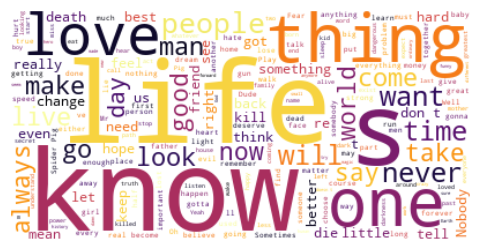

In [20]:
text = " ".join(each for each in df.quote) # join text in each row of quote column into a string

# generate wordcloud image
wordcloud = WordCloud(background_color="white",
                      colormap = 'inferno').generate(text)


# put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, # add wordcloud image to our matplotlib axes
            interpolation='bilinear') # this line helps smooth our image
ax.axis("off")


In [23]:
#!pip install matplotlib_venn
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

#define sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

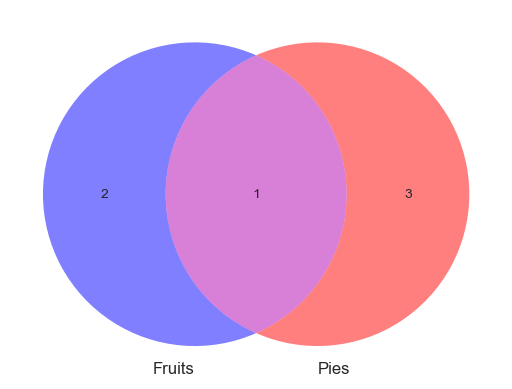

In [24]:
#generate venn diagram
diagram = venn2_unweighted([A, B],
                           set_labels = ('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)
plt.show()

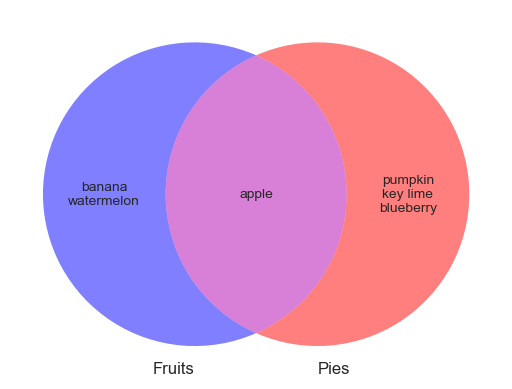

In [25]:
diagram = venn2_unweighted([A, B],
                           set_labels = ('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)

#add each label in a newline
diagram.get_label_by_id("10").set_text("\n".join(A - B)) 
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))

plt.show()